<a href="https://colab.research.google.com/github/khaledkhnissi/Machine_Learning/blob/main/mnist_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

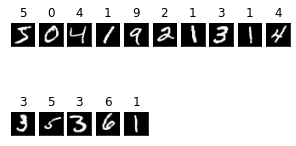

In [4]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
 ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(x_train[i]), cmap='gray')
 ax.set_title(y_train[i])

In [5]:
# determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [7]:
# defining the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)              

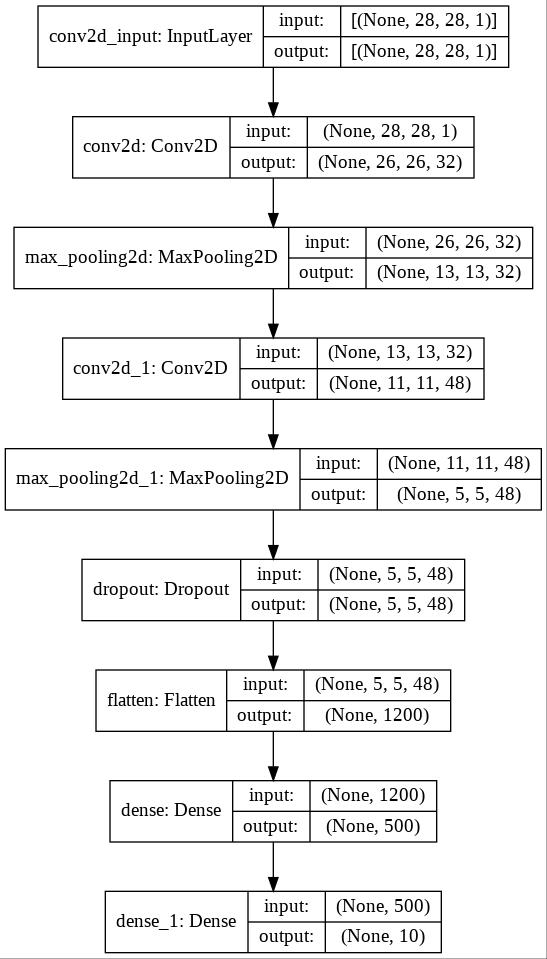

In [9]:
plot_model(model, 'model.jpg', show_shapes=True)

In [10]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x= model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 41s - loss: 0.2415 - accuracy: 0.9261 - val_loss: 0.0591 - val_accuracy: 0.9842
Epoch 2/10
422/422 - 40s - loss: 0.0825 - accuracy: 0.9740 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 3/10
422/422 - 40s - loss: 0.0583 - accuracy: 0.9814 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 4/10
422/422 - 40s - loss: 0.0484 - accuracy: 0.9842 - val_loss: 0.0358 - val_accuracy: 0.9908
Epoch 5/10
422/422 - 40s - loss: 0.0420 - accuracy: 0.9861 - val_loss: 0.0328 - val_accuracy: 0.9912
Epoch 6/10
422/422 - 40s - loss: 0.0355 - accuracy: 0.9882 - val_loss: 0.0320 - val_accuracy: 0.9915
Epoch 7/10
422/422 - 40s - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0295 - val_accuracy: 0.9928
Epoch 8/10
422/422 - 40s - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0272 - val_accuracy: 0.9937
Epoch 9/10
422/422 - 40s - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.0280 - val_accuracy: 0.9933
Epoch 10/10
422/422 - 40s - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0267 - val_accura

In [11]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.22000169754028


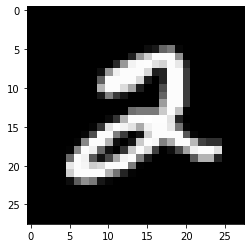

In [12]:
image = x_train[5]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [13]:
image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 2
